In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle 
import plotly.express as px
import random


In [5]:
df1 = pd.read_csv("subject-info.csv")
df2 = pd.read_csv("test_measure.csv")


In [34]:
df1


,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1
...,...,...,...,...,...,...,...,...
987,59.1,64.7,172.0,38.0,24.4,0,856,856_2
988,59.7,65.2,172.0,51.0,16.8,0,856,856_3
989,61.3,102.0,185.0,56.0,20.5,0,390,390_1
990,61.6,74.0,169.0,46.0,23.9,0,596,596_1


In [35]:
df2


,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27.0,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23.0,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29.0,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28.0,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28.0,14.6,2_1,2
...,...,...,...,...,...,...,...,...,...
575082,926,5.0,148.0,1350.0,1699.0,35.0,65.7,857_1,857
575083,927,5.0,147.0,1275.0,1605.0,32.0,60.1,857_1,857
575084,929,5.0,147.0,1259.0,1566.0,29.0,57.0,857_1,857
575085,931,5.0,147.0,1278.0,1587.0,31.0,58.5,857_1,857


#### 17. Display a histogram showing the distribution of athletes by their BMI values.

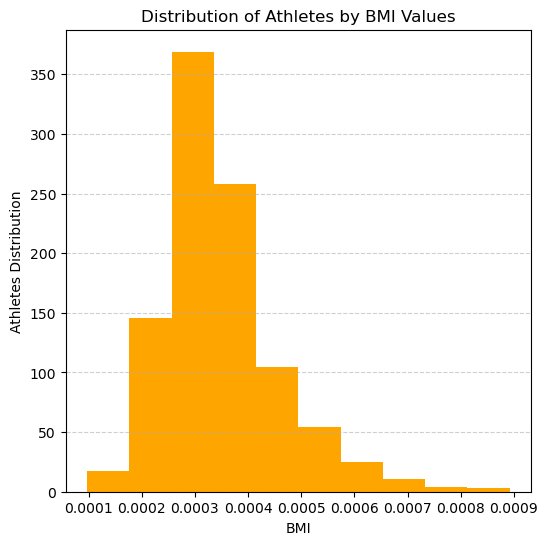

In [45]:
df_copy = df1.copy()

df_copy['Height_m'] = df_copy['Height']/100  #height im cm to height in m
df_copy['BMI'] = df_copy['Height_m']/ (df_copy['Weight']**2)  
df_copy['BMI']

#creating histogram
plt.figure(figsize=(6,6))
plt.hist(df_copy['BMI'], bins=10, color='orange')
plt.title('Distribution of Athletes by BMI Values')
plt.xlabel('BMI')
plt.ylabel('Athletes Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### 18. Who is the tallest participant in the dataset? What is his/her Vo2 kg/ml?

In [37]:
# Merge df1 and df2 based on the 'ID' column
df = pd.merge(df1, df2, on='ID')

# Find the max height value from df1
max_height = df1['Height'].max()

# to get the first row where the height is the maximum
tallest_participant = df[df['Height'] == max_height].iloc[0]

#Vo2 for the tallest participant. 
participant_weight = tallest_participant['Weight']
VO2_ml_per_min = tallest_participant['VO2']

#VO2_ml_per_kg_min = VO2_ml_per_min / participant_weight  #we have Vo2 in mL/min, change to Kg/ml

# Print the ID and Height#
print(f"Tallest participant ID is: {tallest_participant['ID']} and height is : {max_height} cm")
#print(f"VO2 values of tallest participant is : {tallest_participant['VO2_ml_per_kg_min']}")


Tallest participant ID is: 94 and height is : 203.0 cm


#### 19. What is the highest recorded heart rate ? Identify the patient with the highest recorded heart rate.

In [38]:
highest_HR = df2['HR'].max()
highest_HR_patient = df2[df2['HR'] == highest_HR].iloc[0]

print(f"Highest heart rate patient ID is: {highest_HR_patient['ID']} and heart rate is: {highest_HR}")

Highest heart rate patient ID is: 619 and heart rate is: 226.0


#### 20. What is the VO2 max(mL/kg/min) of the shortest male athlete?

In [39]:
# Merge df1 and df2 based on the 'ID' column
df = pd.merge(df1, df2, on='ID')

male_athlete = df[df['Sex']==0]  # for male= 0
min_height = male_athlete['Height'].min()

#shortest male athlete
shortest_male_athlete = male_athlete[male_athlete['Height'] == min_height].iloc[0]

#shortest_male_athlete weight & VO2
shortest_male_athlete_weight = shortest_male_athlete['Weight']
VO2_ml_per_min =shortest_male_athlete['VO2']

VO2_ml_per_kg_min = (VO2_ml_per_min / shortest_male_athlete_weight).max() #we have VO2 in mL/min, change to mL/kg/min

print(f"Shortest male athlete's ID is: {shortest_male_athlete['ID']} and his VO2 max is: {VO2_ml_per_kg_min:.2f}mL/kg/min")

Shortest male athlete's ID is: 367 and his VO2 max is: 6.45mL/kg/min


#### 21. Analyze the mean VO2 and VCO2 values by humidity level using a Multiseries Bar Chart. Based on your findings, how does low humidity affect respiratory and cardiovascular function during exercise (VO2 and VCO2)? Humidity level (<30 - Low) , (30 to 60 - Normal ) ,(>60 - High)

  Humidity_Level          VO2         VCO2
0           High  2379.413412  2423.580857
1            Low  2039.915370  2022.756067
2         Normal  2333.514981  2405.163178


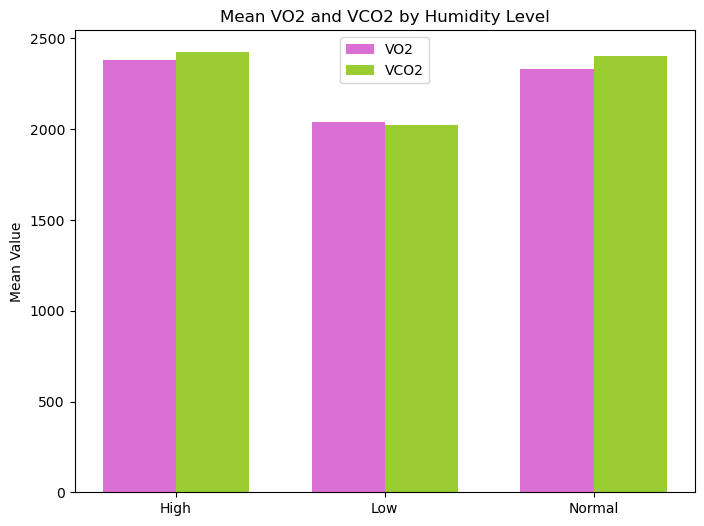

In [43]:
df = pd.merge(df1, df2, on='ID')

#Humidity Level 
def humidity_level(humidity):
    if humidity < 30:
        return 'Low'
    elif 30 <= humidity <= 60:
        return 'Normal'
    else:
        return 'High'
    
#humidity level in merged df
df['Humidity_Level'] = df['Humidity'].apply(humidity_level)

# Group and calculate mean of VO2, VCO2
mean_value = df.groupby('Humidity_Level')[['VO2', 'VCO2']].mean().reset_index()
print(mean_value)

x = mean_value['Humidity_Level']
vo2 = mean_value['VO2']
vco2 = mean_value['VCO2']

# Bar chart
x_axis = range(len(x))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar([i - width/2 for i in x_axis], vo2, width, label='VO2', color='orchid')
ax.bar([i + width/2 for i in x_axis], vco2, width, label='VCO2', color='yellowgreen')

ax.set_xticks(x_axis)
ax.set_xticklabels(x)
ax.set_ylabel('Mean Value')
ax.set_title('Mean VO2 and VCO2 by Humidity Level')
ax.legend()

plt.show()




#### 22. Display the average speed of each participant in ' peak exercise' based on RER (Following question no.14)

In [41]:
df2_copy = df2.copy()

df2_copy['RER'] = df2_copy['VCO2'] /df2_copy['VO2'] # find out RER = VCO2/VO2

#Exercise phases
def excercise_phases(RER):
    if RER < 0.85:
        return 'warmup'
    elif 0.85 <= RER < 1.00:
        return 'moderate'
    else:
        return 'peak exercise'

df2_copy['excercise_phases'] = df2_copy['RER'].apply(excercise_phases)


# Filter for Peak Exercise rows
peak_exercise = df2_copy[df2_copy['excercise_phases'] == 'peak exercise']

# Group by participant and calculate average speed
average_speed_in_peak_excer = peak_exercise.groupby('ID')['Speed'].mean().reset_index()

# Rename columns nicely
#average_speed_peak.columns = ['Participant_ID', 'Average Speed (Peak Exercise)']

# Display
print(average_speed_in_peak_excer)

      ID      Speed
0      1   9.892920
1      2  10.850575
2      3  12.000597
3      4  10.787342
4      5   9.007265
..   ...        ...
852  853   8.858986
853  854   6.149524
854  855  12.110079
855  856  10.712664
856  857  10.231186

[857 rows x 2 columns]


#### 23. Assign one of the following 5 heart rate zones for every Athletes and add this as a column to a new table with all unique IDs. Exclude Warm-Up Phase
 
#### Zone 1 (recovery/easy) <100 HR max
#### Zone 2 (aerobic/base) 100-120 HR max
#### Zone 3 (tempo) 120-135 HR max
#### Zone 4 (lactate threshold) 135-155 HR max
#### Zone 5 (anaerobic) 155+ HR max and above"

In [42]:
#Define function to assign HR Zone
def HR_zones(hr):
    if hr < 100:
        return 'Zone 1 (recovery/easy)'
    elif 100 <= hr < 120:
        return 'Zone 2 (aerobic/base)'
    elif 120 <= hr < 135:
        return 'Zone 3 (tempo)'
    elif 135 <= hr < 155:
        return 'Zone 4 (lactate threshold)'
    else:
        return 'Zone 5 (anaerobic)'

#create a new 'Zone' column
df2['Zones'] = df2['HR'].apply(HR_zones)

#new table with only unique IDs and Zone
new_table = df2[['ID','Zones']].drop_duplicates()

# Print final result
print(new_table)



         ID                       Zones
0         2      Zone 1 (recovery/easy)
13        2       Zone 2 (aerobic/base)
121       2              Zone 3 (tempo)
173       2  Zone 4 (lactate threshold)
267       2          Zone 5 (anaerobic)
...     ...                         ...
574584  857      Zone 1 (recovery/easy)
574587  857       Zone 2 (aerobic/base)
574595  857              Zone 3 (tempo)
574711  857  Zone 4 (lactate threshold)
574764  857          Zone 5 (anaerobic)

[4177 rows x 2 columns]


#### 24. Find the athlete who has got optimal respiratory stability based on the measure of Breathing Interval variability over time.

In [ ]:
df2_copy = df2.copy()

#Calculate Breathing Interval (Breathing Interval = 60000 / RR)
df2_copy['Breathing Interval'] = 60000 / df2_copy['RR']

#Group by athlete ID and calculate variability (standard deviation of Breathing Interval)
variability = df2_copy.groupby('ID')['Breathing Interval'].std().reset_index().round(2)

#athlete with the lowest variability (optimal stability)
optimal_athlete = variability.loc[variability['Breathing Interval'].idxmin()]

#optimal respiratory stability
print(optimal_athlete )


ID                    175.00
Breathing Interval    206.23
Name: 174, dtype: float64


#### 25. Generate a pie chart to show the gender-wise distribution of athletes.

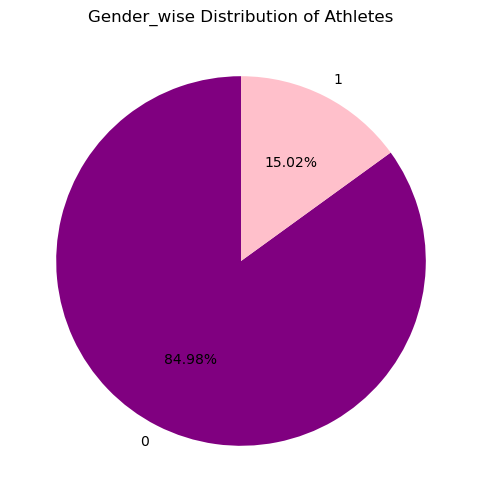

In [43]:
# Count gender distribution
M_F_counts = df1['Sex'].value_counts()

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(M_F_counts, labels=M_F_counts.index, autopct='%.2f%%', startangle=90, colors=['purple', 'pink']) # 1= female, 0=male
plt.title('Gender_wise Distribution of Athletes')


# Show the plot
plt.show()

#### 26. Use enumeration to print ID, Sex, and BMI of each athlete.

In [44]:
df1_copy = df1.copy()

#BMI calculation
df1_copy['Height_m'] = df1_copy['Height']/100  #height im cm to height in m 
df1_copy['BMI'] = df1_copy['Weight'] / (df1_copy['Height_m'] ** 2)

# Enumerate BMI, ID, Sex
for index, row in enumerate(df1_copy.head(10).itertuples(), start=1):
    print(f"{index}. ID: {row.ID}, Sex: {row.Sex}, BMI: {row.BMI:.2f}")

1. ID: 543, Sex: 1, BMI: 18.37
2. ID: 11, Sex: 1, BMI: 18.22
3. ID: 829, Sex: 0, BMI: 17.97
4. ID: 284, Sex: 1, BMI: 19.67
5. ID: 341, Sex: 0, BMI: 18.68
6. ID: 341, Sex: 0, BMI: 18.26
7. ID: 343, Sex: 0, BMI: 17.97
8. ID: 330, Sex: 0, BMI: 17.53
9. ID: 338, Sex: 0, BMI: 18.39
10. ID: 339, Sex: 0, BMI: 19.39


#### 27. Create a sunburst chart to show the distribution of athletes based on Sex, BMI levels, and Age ranges.

In [45]:
df1_copy = df1.copy()

#BMI Distribution
df1_copy['Height_m'] = df1_copy['Height']/100  #height im cm to height in m 
df1_copy['BMI'] = df1_copy['Weight'] / (df1_copy['Height_m'] ** 2)

def func_bmi(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 25:
        return 'Normal weight'
    elif 25 <= BMI < 30:
        return 'Overweight'
    else:
        return 'Obesity'

#Age Distribution
def func_age(Age):
    
    Age = float(Age)
    if Age < 20:
        return 'Teen'
    elif 20 <= Age < 30:
        return 'Young Adult'
    elif 30 <= Age < 40:
        return 'Adult'
    else:
        return 'Senior'

#Sex Distribution
def func_sex(Sex):
    if Sex == 0:
        return 'Male'
    else:
        return 'Female'

#Create new columns in df1_copy
df1_copy['BMI'] = df1_copy['BMI'].apply(func_bmi)
df1_copy['Age'] = df1_copy['Age'].apply(func_age)
df1_copy['Sex'] = df1_copy['Sex'].apply(func_sex)

#Create a Sunburst Chart
fig = px.sunburst(
    df1_copy,
    path=['Sex', 'BMI', 'Age'],  # Order of hierarchy
    values=None, 
    color='Sex',
    color_discrete_map={'Male':'deepskyblue', 'Female':'hotpink'},  
    title="Distribution of Athletes by Sex, BMI and Age"
)

fig.show()


#### 28. Create a dictionary using any 5 random Athletes ID and their height. 
#### Access any one height using the Athlete ID with get() function.

In [46]:
#IDs and Heights lists 
athlete_id = df1['ID'].tolist()
athlete_height = df1['Height'].tolist()

#Combine ID and Height into a list of pairs
combine_id_height = list(zip(athlete_id, athlete_height))

#pick 5 athletes randomly
random_5 = random.sample(combine_id_height, 5)

#Convert to dictionary
athlete_height_dict = dict(random_5)


print(athlete_height_dict)

#one height using get() function from the dictionary
random_id = random.choice(list(athlete_height_dict.keys()))
print(f"Height of {random_id}:", athlete_height_dict.get(random_id))


{560: 183.7, 20: 181.2, 99: 165.4, 313: 158.0, 696: 176.0}
Height of 313: 158.0


#### 29. Find which age range has the highest number of obese athletes.

In [29]:
df1_copy = df1.copy()


df1_copy['Height_m'] = df1_copy['Height'] / 100
df1_copy['BMI'] = df1_copy['Weight'] / (df1_copy['Height_m'] ** 2)

# Filter obese
obese = df1_copy[df1_copy['BMI'] >= 30].copy()

# Create Age Range
obese['Age_Range'] = pd.cut(obese['Age'], bins=[0, 15, 30, 45, 60, 75], labels=['0-15', '16-30', '31-45', '46-60', '61-75'], right=False)

# Group and count
age_range_group = obese.groupby('Age_Range', observed=False).size()

highest_age_range = age_range_group.idxmax()
highest_count = age_range_group.max()

print(f"Highest age range is: {highest_age_range} and the highest count is: {highest_count}")


Highest age range is: 16-30 and the highest count is: 13


#### 30. Create a waffle chart to show the percentage of participant in each HR zone (followed by question 23)

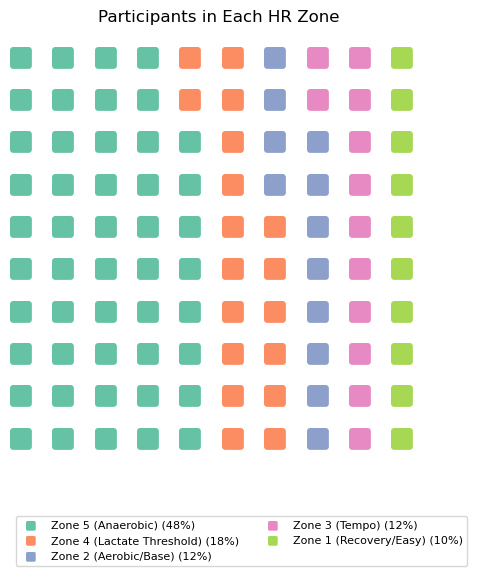

In [48]:
def get_hr_zone(hr):
    if hr < 100:
        return 'Zone 1 (Recovery/Easy)'
    elif 100 <= hr < 120:
        return 'Zone 2 (Aerobic/Base)'
    elif 120 <= hr < 135:
        return 'Zone 3 (Tempo)'
    elif 135 <= hr < 155:
        return 'Zone 4 (Lactate Threshold)'
    else:
        return 'Zone 5 (Anaerobic)'

df2['Zone'] = df2['HR'].apply(get_hr_zone)

# Percentage of participant in each HR zone
zone_counts = df2['Zone'].value_counts(normalize=True) * 100  
zone_counts = zone_counts.round(0).astype(int)  

# Waffle chart
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, columns =10,
    values=zone_counts.to_dict(),
    title={'label': 'Participants in Each HR Zone', 'loc': 'center'},
    labels=[f"{k} ({v}%)" for k, v in zone_counts.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0,-0.3), 'ncol': 2, 'fontsize': 8},
    figsize=(10, 6),
    icons='square', icon_size=18, icon_legend=True
)
plt.show()



#### 31. Calculate the Tidal volume of every athlete and display it as a list.

In [8]:
# Tidal volume(TV) = VE/RR

df2_copy = df2.copy()

df2_copy['TV'] = df2_copy['VE']/df2_copy['RR']
Tidal_Volume = df2_copy[['ID','TV']].head(5)
print(Tidal_Volume)

   ID        TV
0   2  0.492593
1   2  0.447826
2   2  0.420690
3   2  0.457143
4   2  0.521429


#### 32. create a Pivot table to summarize the count of each HR Zone

In [47]:
df2_copy = df2.copy()

#Define function to assign HR Zone
def HR_zones(hr):
    if hr < 100:
        return 'Zone 1 (recovery/easy)'
    elif 100 <= hr < 120:
        return 'Zone 2 (aerobic/base)'
    elif 120 <= hr < 135:
        return 'Zone 3 (tempo)'
    elif 135 <= hr < 155:
        return 'Zone 4 (lactate threshold)'
    else:
        return 'Zone 5 (anaerobic)'

#new 'Zone' column
df2_copy['new_zones'] = df2_copy['HR'].apply(HR_zones)

#Create pivot table to summarize the count of each HR Zone
pivot_table = df2_copy.pivot_table(index='new_zones', values='HR', aggfunc='count')

#Rename the HR column for clarity
pivot_table = pivot_table.rename(columns={'HR': 'Count'})

print(pivot_table)



                             Count
new_zones                         
Zone 1 (recovery/easy)       57869
Zone 2 (aerobic/base)        70397
Zone 3 (tempo)               66768
Zone 4 (lactate threshold)  104141
Zone 5 (anaerobic)          274810
